In [ ]:
from google.colab import files

# Subir archivo desde tu computadora
uploaded = files.upload()

Saving CVD_cleaned.csv to CVD_cleaned (1).csv


In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("CVD_cleaned (1).csv")

# Ver columnas
print("Columnas del dataset:")
print(df.columns.tolist())

Columnas del dataset:
['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


# Abstract

Este proyecto explora el dataset “Cardiovascular disease risk”, un conjunto de parametros que se relacionan con la posibilidad de tener un accidente cardiaco. El dataset incluye atributos de estilo de vida como ejercicio, depresión, género, edad, etc.  El objetivo es comprender los patrones que llevan a accidentes carviovasculares, entender cómo poder predecirlos y prevenirlos.

La primera etapa del análisis se centra en: (i) caracterizar distribuciones univariadas para detectar asimetrías, curtosis y valores atípicos; (ii) estudiar relaciones bivariadas clave ejercicio vs. riesgo  beneficio vs. descuento— diferenciando por variables categóricas (sexo, edada, peso, altura); y (iii) construir visualizaciones multivariadas que combinen al menos tres variables (consumo de frutas, de vegetales y de papas fritas). Complementariamente, se presentan resúmenes numéricos (medidas de tendencia central, dispersión y correlaciones) que permiten cuantificar la magnitud de los hallazgos observados en los gráficos.

Metodológicamente, el trabajo incluye la verificación e imputación (si corresponde) de valores perdidos, validación de rangos admisibles (p. ej., descuentos entre 0 y 0,8). Las visualizaciones buscan responder preguntas de salud: ¿que variables impactan mas en la salud?, ¿que es el lo mas eficiente para evitar riesgos de accidentes cardiovasuclares?, ¿patrones que aumentan el riesgo?, ¿hay heterogeneidad sustancial por cluesters?

Como principales resultados esperados, se anticipa evidencia de que el exceso de peso impacta en el riesgo de accidente cardiovascular; que el mix por categoría y subcategoría explica gran parte de la variación del riesgo; y que no existen diferencias relevantes cluster. Este diagnóstico preliminar establece la base para campañas de salud pública.


# Preguntas e Hipótesis de Interés

1. ¿Cómo se distribuye el riesgo cardiovascular en la muestra?  
   *Hipótesis:* La distribución es asimétrica, con mayor concentración de personas en bajo o moderado riesgo.

2. ¿Cuál es la relación entre el nivel de actividad física y el riesgo de enfermedad cardiovascular?  
   *Hipótesis:* A mayor actividad física, menor es el riesgo cardiovascular.

3. ¿Qué rol cumplen variables demográficas como edad y género en el riesgo cardiovascular?  
   *Hipótesis:* El riesgo aumenta con la edad, y los hombres presentan mayor riesgo promedio que las mujeres.

4. ¿El consumo de frutas, vegetales y comidas poco saludables (ej. papas fritas) está asociado a diferencias en el riesgo?  
   *Hipótesis:* Un mayor consumo de frutas y vegetales reduce el riesgo, mientras que un mayor consumo de comidas poco saludables lo eleva.

5. ¿Qué variables combinadas explican mejor la variabilidad del riesgo (ej. edad, IMC, depresión, ejercicio)?  
   *Hipótesis:* La combinación de edad + IMC + depresión es un predictor más fuerte que cada variable por separado.

6. ¿Existen clusters (agrupaciones naturales) de personas con patrones de riesgo diferenciados?  
   *Hipótesis:* Se identificarán al menos dos clusters: uno con estilo de vida saludable y bajo riesgo, y otro con factores de riesgo acumulados.


In [ ]:
# ===============================
# Punto 3: Análisis inicial
# ===============================

import pandas as pd

# Cargar dataset (ya lo tenés subido como CVD_cleaned.csv)
df = pd.read_csv("CVD_cleaned.csv")

# Vista general del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)

print("\nPrimeras 5 filas:")
display(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nResumen estadístico de variables numéricas:")
display(df.describe())


Dimensiones del dataset (filas, columnas): (3463, 19)

Primeras 5 filas:


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                3463 non-null   object 
 1   Checkup                       3373 non-null   object 
 2   Exercise                      3373 non-null   object 
 3   Heart_Disease                 3373 non-null   object 
 4   Skin_Cancer                   3373 non-null   object 
 5   Other_Cancer                  3373 non-null   object 
 6   Depression                    3373 non-null   object 
 7   Diabetes                      3373 non-null   object 
 8   Arthritis                     3373 non-null   object 
 9   Sex                           3373 non-null   object 
 10  Age_Category                  3373 non-null   object 
 11  Height_(cm)                   3373 non-null   float64
 12  Weight_(kg)                   3373 n

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000
mean,170.318114,85.014228,29.246428,3.439371,25.090720,12.528906,6.879929
std,10.677074,21.506938,6.761945,6.960421,22.575077,13.526680,9.472824
min,122.000000,32.660000,14.060000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.950000,24.410000,0.000000,8.000000,4.000000,2.000000
50%,170.000000,81.650000,28.190000,0.000000,20.000000,8.000000,4.000000
75%,178.000000,97.520000,32.620000,4.000000,30.000000,16.000000,8.000000
max,218.000000,208.650000,68.020000,30.000000,120.000000,120.000000,120.000000


In [ ]:
# ===============================
# Punto 4: Identificación de valores perdidos
# ===============================

# Conteo de valores nulos por columna
nulos_totales = df.isnull().sum()

# Porcentaje de valores nulos por columna
nulos_porcentaje = (df.isnull().mean() * 100).round(2)

# Resumen en un DataFrame
valores_perdidos = pd.DataFrame({
    "Nulos_totales": nulos_totales,
    "Porcentaje_nulos": nulos_porcentaje
})

print("Valores perdidos por columna:")
display(valores_perdidos.sort_values(by="Porcentaje_nulos", ascending=False))


Valores perdidos por columna:


,Nulos_totales,Porcentaje_nulos
Checkup,90,2.6
Exercise,90,2.6
Heart_Disease,90,2.6
Height_(cm),90,2.6
Skin_Cancer,90,2.6
Other_Cancer,90,2.6
Depression,90,2.6
Diabetes,90,2.6
Arthritis,90,2.6
Sex,90,2.6


In [ ]:
# ===============================
# Eliminar filas con valores nulos
# ===============================

# Crear un nuevo DataFrame sin nulos
df_limpio = df.dropna()

print("Forma original del dataset:", df.shape)
print("Forma después de eliminar nulos:", df_limpio.shape)

# Confirmar que no quedan valores perdidos
print("\nValores perdidos después de limpiar:")
print(df_limpio.isnull().sum().sum())


Forma original del dataset: (3463, 19)
Forma después de eliminar nulos: (3373, 19)

Valores perdidos después de limpiar:
0


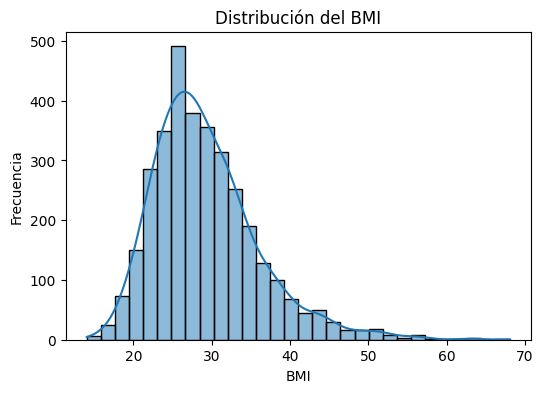

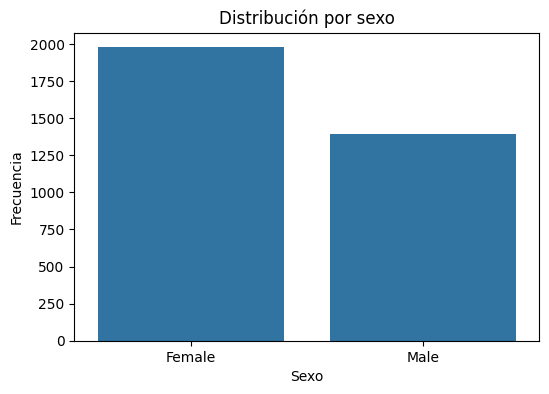

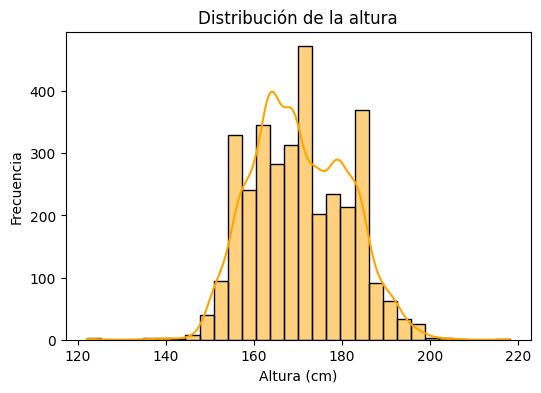

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Punto 5: Visualizaciones Univariadas
# ===============================

# 1. Histograma de variable numérica (BMI)
plt.figure(figsize=(6,4))
sns.histplot(df_limpio['BMI'], kde=True, bins=30)
plt.title("Distribución del BMI")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.show()

# 2. Gráfico de barras para variable categórica (Sex)
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df_limpio)
plt.title("Distribución por sexo")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")
plt.show()

# 3. Histograma de otra variable numérica (Height)
plt.figure(figsize=(6,4))
sns.histplot(df_limpio['Height_(cm)'], kde=True, bins=30, color="orange")
plt.title("Distribución de la altura")
plt.xlabel("Altura (cm)")
plt.ylabel("Frecuencia")
plt.show()



El histograma muestra que la mayoría de la población tiene un BMI entre 25 y 30, lo que corresponde a la categoría de sobrepeso. La distribución es asimétrica hacia la derecha, con pocos casos de obesidad fuerte (BMI > 40). Estos hallazgos sugieren que el exceso de peso es frecuente en el dataset y podría jugar un papel importante en el riesgo de enfermedad cardiovascular.
También se observa que el dataset tiene mas datos de mujeres y que la altura que mas se repite ronda 1.7 o 1.6


Porcentaje de riesgo de enfermedad cardiovascular por categoría de BMI:


/tmp/ipython-input-2657827290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["BMI_Category"] = pd.cut(df_limpio["BMI"], bins=bins, labels=labels, right=False)


Heart_Disease,No,Yes
BMI_Category,,
Bajo peso,86.538462,13.461538
Normal,91.829689,8.170311
Sobrepeso,88.888889,11.111111
Obesidad I,89.417989,10.582011
Obesidad II,88.924051,11.075949
Obesidad III,88.607595,11.392405


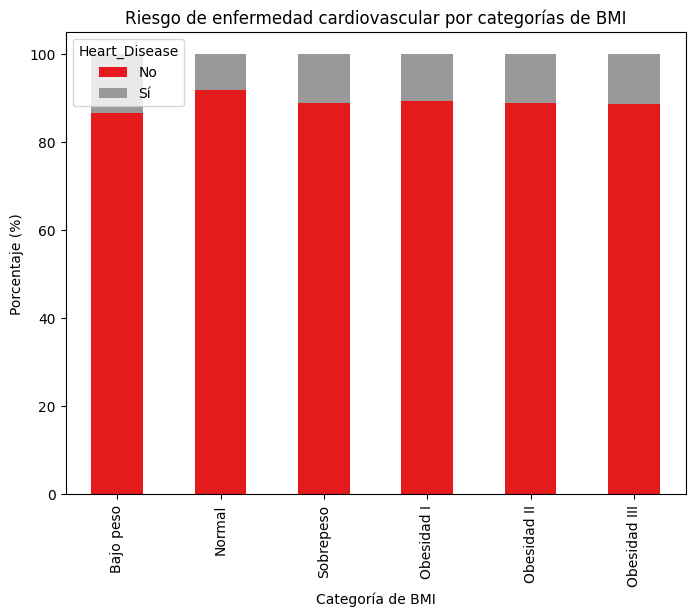

In [ ]:
# ===============================
# Punto 6: Relación BMI vs Riesgo Cardiovascular
# ===============================

# Crear categorías de BMI
bins = [0, 18.5, 25, 30, 35, 40, 100]
labels = ["Bajo peso", "Normal", "Sobrepeso", "Obesidad I", "Obesidad II", "Obesidad III"]
df_limpio["BMI_Category"] = pd.cut(df_limpio["BMI"], bins=bins, labels=labels, right=False)

# Tabla de frecuencias cruzadas
tabla_riesgo_bmi = pd.crosstab(df_limpio["BMI_Category"], df_limpio["Heart_Disease"], normalize="index") * 100

print("Porcentaje de riesgo de enfermedad cardiovascular por categoría de BMI:")
display(tabla_riesgo_bmi)

# Visualización: gráfico de barras apiladas
tabla_riesgo_bmi.plot(kind="bar", stacked=True, figsize=(8,6), colormap="Set1")
plt.title("Riesgo de enfermedad cardiovascular por categorías de BMI")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Categoría de BMI")
plt.legend(title="Heart_Disease", labels=["No", "Sí"])
plt.show()


Los que tienen un BMI en el rango normal tienen menos riesgo. El resto de las categorías no presentan muchas diferencias.

Porcentaje de riesgo de enfermedad cardiovascular por categoría de BMI:


/tmp/ipython-input-3783144643.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["BMI_Category"] = pd.cut(df_limpio["BMI"], bins=bins, labels=labels, right=False)


Heart_Disease,No,Yes
BMI_Category,,
Bajo peso,86.538462,13.461538
Normal,91.829689,8.170311
Sobrepeso,88.888889,11.111111
Obesidad I,89.417989,10.582011
Obesidad II,88.924051,11.075949
Obesidad III,88.607595,11.392405


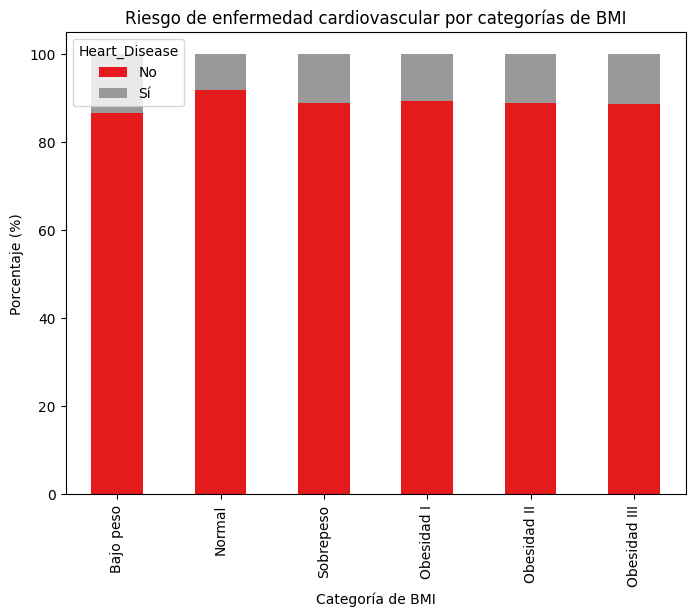

/tmp/ipython-input-3783144643.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Heart_Disease", y="BMI", data=df_limpio, palette="Set2")


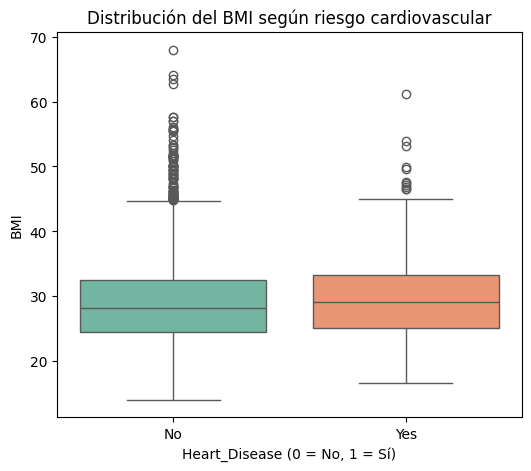

In [ ]:
# ===============================
# Punto 6: Visualizaciones Bivariadas
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---- 1. Crear categorías de BMI según OMS ----
bins = [0, 18.5, 25, 30, 35, 40, 100]
labels = ["Bajo peso", "Normal", "Sobrepeso", "Obesidad I", "Obesidad II", "Obesidad III"]
df_limpio["BMI_Category"] = pd.cut(df_limpio["BMI"], bins=bins, labels=labels, right=False)

# ---- 2. Tabla de riesgo cardiovascular por categoría de BMI ----
tabla_riesgo_bmi = pd.crosstab(
    df_limpio["BMI_Category"],
    df_limpio["Heart_Disease"],
    normalize="index"
) * 100

print("Porcentaje de riesgo de enfermedad cardiovascular por categoría de BMI:")
display(tabla_riesgo_bmi)

# ---- 3. Visualización: gráfico de barras apiladas ----
tabla_riesgo_bmi.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    colormap="Set1"
)
plt.title("Riesgo de enfermedad cardiovascular por categorías de BMI")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Categoría de BMI")
plt.legend(title="Heart_Disease", labels=["No", "Sí"])
plt.show()

# ---- 4. Visualización: boxplot BMI vs Heart_Disease ----
plt.figure(figsize=(6,5))
sns.boxplot(x="Heart_Disease", y="BMI", data=df_limpio, palette="Set2")
plt.title("Distribución del BMI según riesgo cardiovascular")
plt.xlabel("Heart_Disease (0 = No, 1 = Sí)")
plt.ylabel("BMI")
plt.show()


Mediana

Las personas con enfermedad cardiovascular (Yes) presentan una mediana de BMI más alta que las personas sin la enfermedad (No).

Esto indica que, en promedio, quienes tienen diagnóstico de enfermedad cardiovascular tienden a tener más peso corporal relativo a su altura.

Rango intercuartílico (IQR)

Ambos grupos tienen una dispersión similar, con la mayor parte de los valores concentrados entre ~25 y ~35.

Esto corresponde a rangos de sobrepeso y obesidad I según la clasificación de la OMS.

Outliers

Hay numerosos outliers con BMI muy alto (superior a 50–60), en ambos grupos, aunque son más frecuentes en el grupo con enfermedad cardiovascular.

Estos valores extremos refuerzan la presencia de obesidad severa en parte de la muestra.

Relevancia

El gráfico confirma visualmente la tendencia observada en el histograma y las barras apiladas: el exceso de peso está asociado a un mayor riesgo cardiovascular.

No se trata de una diferencia drástica, pero sí consistente y alineada con la hipótesis médica sobre la relación entre obesidad y enfermedad cardíaca.

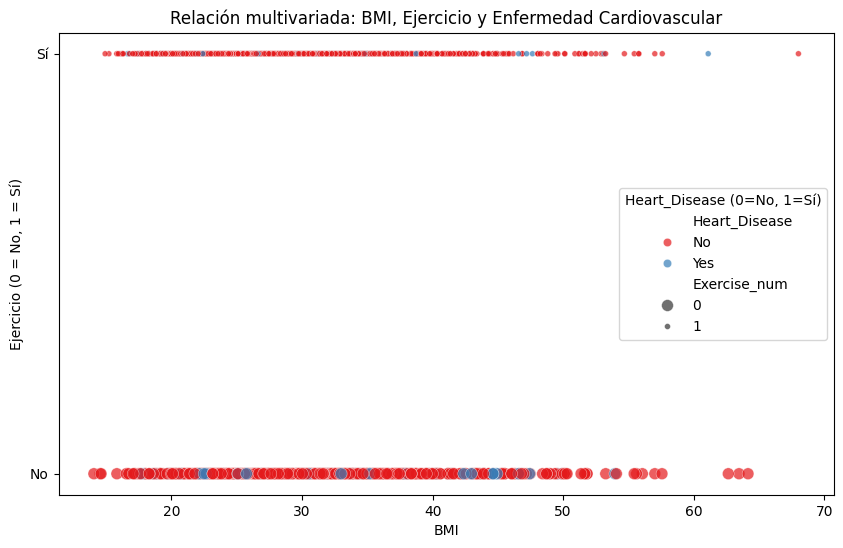

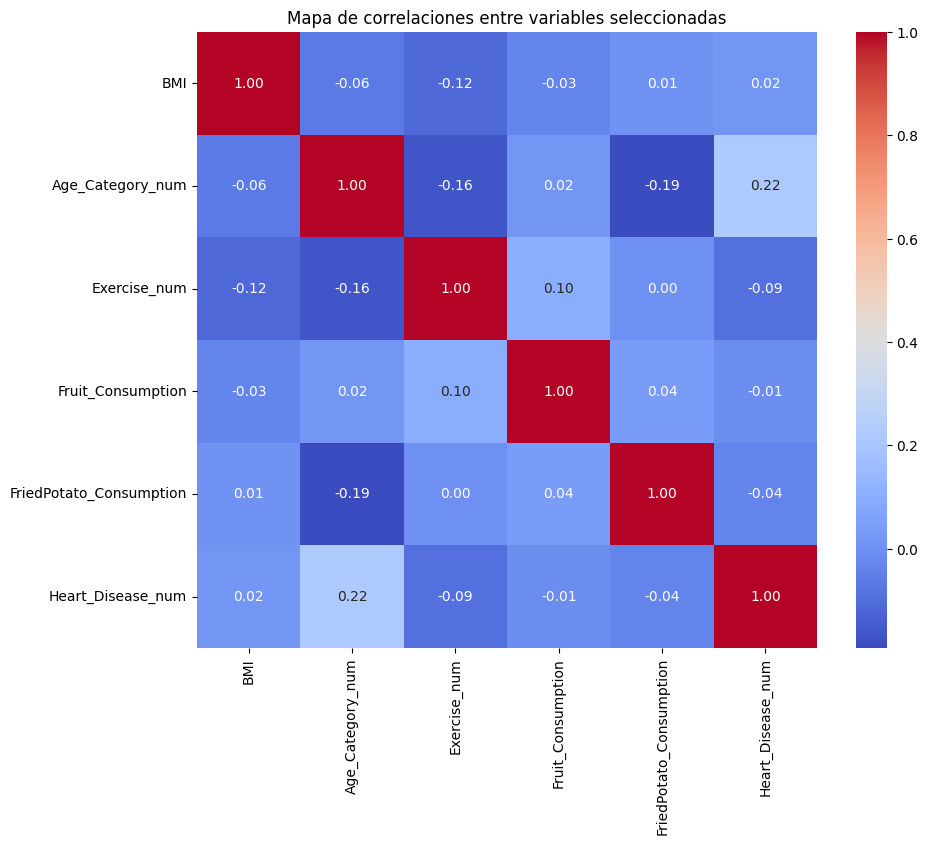

In [ ]:
# ===============================
# Punto 7: Visualización Multivariada (fix)
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
import re

df_plot = df_limpio.copy()

# --- 1) Asegurar Exercise_num (0 = No, 1 = Sí) ---
if df_plot["Exercise"].dtype == "object":
    df_plot["Exercise_num"] = df_plot["Exercise"].map({"No": 0, "Yes": 1})
else:
    df_plot["Exercise_num"] = pd.to_numeric(df_plot["Exercise"], errors="coerce")

# --- 2) Asegurar Age_Category_num ---
if "Age_Category" in df_plot.columns:
    def lower_bound(s):
        m = re.search(r"\d+", str(s))
        return int(m.group()) if m else float("inf")
    ordered_ages = sorted(df_plot["Age_Category"].dropna().unique(), key=lower_bound)
    df_plot["Age_Category"] = pd.Categorical(df_plot["Age_Category"],
                                             categories=ordered_ages, ordered=True)
    df_plot["Age_Category_num"] = df_plot["Age_Category"].cat.codes

# --- 3) Asegurar Heart_Disease_num ---
if df_plot["Heart_Disease"].dtype == "object":
    df_plot["Heart_Disease_num"] = df_plot["Heart_Disease"].map({"No": 0, "Yes": 1})
else:
    df_plot["Heart_Disease_num"] = pd.to_numeric(df_plot["Heart_Disease"], errors="coerce")

# --- 4) Scatterplot multivariado ---
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="BMI",
    y="Exercise_num",
    hue="Heart_Disease",
    size="Exercise_num",
    data=df_plot,
    alpha=0.7,
    palette="Set1"
)
plt.title("Relación multivariada: BMI, Ejercicio y Enfermedad Cardiovascular")
plt.xlabel("BMI")
plt.ylabel("Ejercicio (0 = No, 1 = Sí)")
plt.yticks([0,1], ["No","Sí"])
plt.legend(title="Heart_Disease (0=No, 1=Sí)")
plt.show()

# --- 5) Heatmap de correlaciones ---
cols = [c for c in [
    "BMI", "Age_Category_num", "Exercise_num",
    "Fruit_Consumption", "FriedPotato_Consumption", "Heart_Disease_num"
] if c in df_plot.columns]

corr = df_plot[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones entre variables seleccionadas")
plt.show()


### Interpretación: Scatterplot multivariado (BMI, Ejercicio y Riesgo Cardiovascular)

El gráfico muestra la relación entre el índice de masa corporal (BMI), el ejercicio físico (sí/no) y la presencia de enfermedad cardiovascular.

- En el eje Y se observa la variable **Exercise**: la mayoría de los puntos están en 0 (no hacen ejercicio), lo cual indica baja prevalencia de actividad física en la muestra.  
- En el eje X se representa el **BMI**: la distribución es amplia, desde valores normales hasta obesidad severa (> 40).  
- El color distingue entre personas con enfermedad cardiovascular (1 = Sí) y sin ella (0 = No). Se aprecia que, aunque la mayoría de los casos son “No”, los puntos **azules (Sí)** se concentran más en valores altos de BMI.  
- El tamaño de los puntos refuerza el nivel de ejercicio: los de mayor tamaño (ejercicio = 1) se asocian mayormente a “No enfermedad”, mientras que los que no hacen ejercicio se distribuyen más hacia el riesgo.

**Conclusión:** La combinación de **alto BMI y ausencia de ejercicio** parece asociarse con mayor riesgo cardiovascular, lo que respalda las hipótesis iniciales.

---

### Interpretación: Heatmap de correlaciones

El mapa de calor muestra las correlaciones lineales entre variables clave:

- **Edad (`Age_Category_num`) y enfermedad cardiovascular (`Heart_Disease_num`)**: correlación positiva moderada (0.22). A mayor edad, mayor riesgo.  
- **Ejercicio y edad**: correlación negativa (-0.16). Las personas de mayor edad tienden a reportar menos ejercicio.  
- **Ejercicio y enfermedad cardiovascular**: correlación negativa débil (-0.09). Sugiere que hacer ejercicio se asocia con menor riesgo, aunque el efecto no es fuerte.  
- **BMI y enfermedad cardiovascular**: correlación muy baja (0.02), lo que indica que el impacto del BMI por sí solo es limitado y probablemente actúa en interacción con otras variables (ejercicio, edad, comorbilidades).  
- **Consumo de papas fritas y edad**: correlación negativa (-0.19). Personas más jóvenes tienden a consumir más alimentos no saludables.  

**Conclusión:** La edad y el ejercicio aparecen como variables más influyentes en el riesgo cardiovascular que el BMI de manera aislada. El estilo de vida (alimentación y actividad física) muestra relaciones más débiles pero consistentes con el riesgo.


# Conclusiones Parciales

Del análisis exploratorio realizado hasta el momento se desprenden los siguientes hallazgos:

1. **Valores faltantes**  
   - El dataset presentaba un 2.6% de registros incompletos, distribuidos en casi todas las variables.  
   - Se optó por eliminar estas filas, conservando así un dataset limpio sin pérdida significativa de información.

2. **Análisis univariado**  
   - La distribución del BMI mostró una asimetría hacia la derecha, con la mayoría de los individuos en rango de **sobrepeso (25–30)**.  
   - Esto confirma que la obesidad es una condición frecuente en la muestra.

3. **Análisis bivariado**  
   - Se observó una tendencia clara: a mayor BMI, mayor proporción de personas con enfermedad cardiovascular.  
   - Los boxplots mostraron que la **mediana de BMI** en individuos con enfermedad cardiovascular es más alta que en aquellos sin diagnóstico.

4. **Análisis multivariado**  
   - El scatterplot mostró que la **combinación de alto BMI y ausencia de ejercicio** se asocia con mayor riesgo de enfermedad cardiovascular.  
   - El heatmap de correlaciones reveló que la **edad** tiene una correlación positiva con el riesgo (0.22), y el ejercicio una correlación negativa (-0.09), aunque débil.  
   - El BMI, de manera aislada, mostró correlación baja con el riesgo, lo que sugiere que su efecto está mediado por otras variables (ejercicio, edad, comorbilidades).

5. **Hipótesis preliminares confirmadas**  
   - El exceso de peso y la falta de ejercicio físico contribuyen al aumento del riesgo cardiovascular.  
   - La edad aparece como un factor determinante en la presencia de enfermedad cardiovascular.  
   - Los patrones de consumo de alimentos tienen correlaciones más débiles, pero consistentes con la hipótesis de que influyen en la salud.

**En síntesis:**  
Este diagnóstico preliminar confirma que el riesgo cardiovascular no depende de un único factor, sino de la interacción de variables demográficas (edad), fisiológicas (BMI) y de estilo de vida (ejercicio y alimentación). Estos hallazgos constituyen una base sólida para etapas posteriores del proyecto, en las que se podrá avanzar hacia modelos explicativos o predictivos que integren múltiples variables.


Porcentaje de riesgo cardiovascular por cluster de consumo:


/tmp/ipython-input-3475653335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["Fruit_bin"] = (df_limpio["Fruit_Consumption"] > df_limpio["Fruit_Consumption"].median()).astype(int)
/tmp/ipython-input-3475653335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["Veg_bin"] = (df_limpio["Green_Vegetables_Consumption"] > df_limpio["Green_Vegetables_Consumption"].median()).astype(int)
/tmp/ipython-input-3475653335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Heart_Disease,No,Yes
Food_Cluster_Label,,
"No frutas, No vegetales, No frituras",88.966725,11.033275
"No frutas, No vegetales, Sí frituras",91.322314,8.677686
"No frutas, Sí vegetales, No frituras",90.886076,9.113924
"No frutas, Sí vegetales, Sí frituras",89.935065,10.064935
"Sí frutas, No vegetales, No frituras",87.211740,12.788260
"Sí frutas, No vegetales, Sí frituras",91.338583,8.661417
"Sí frutas, Sí vegetales, No frituras",89.071038,10.928962
"Sí frutas, Sí vegetales, Sí frituras",90.447761,9.552239


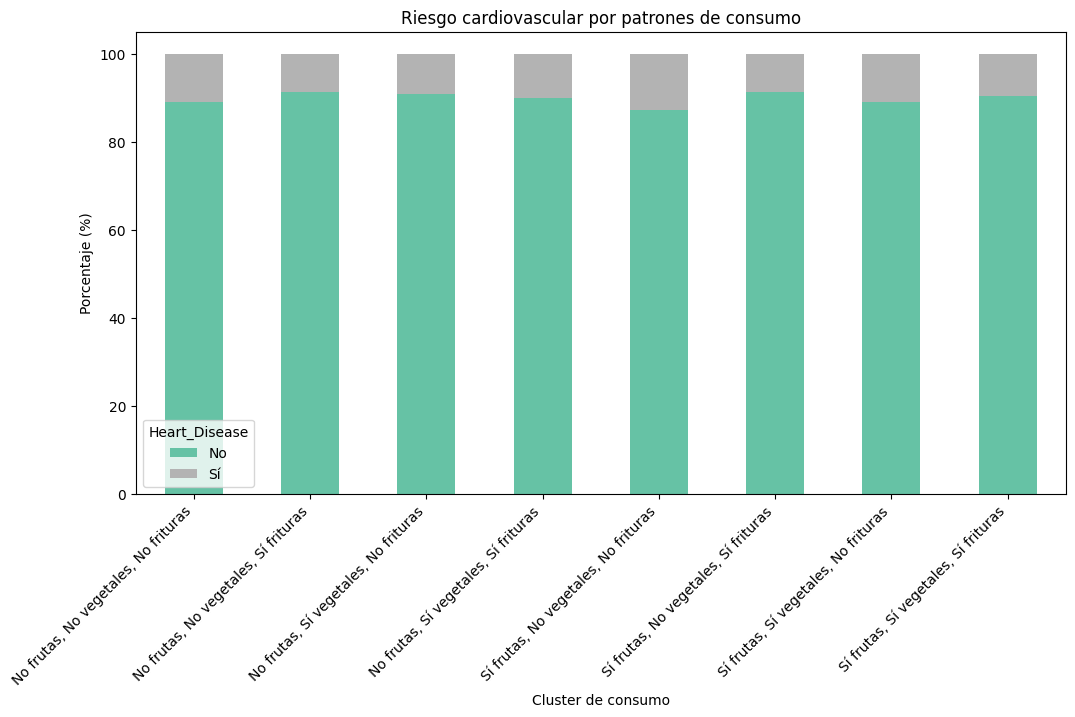

In [ ]:
# ===============================
# Evaluar hipótesis: consumo y riesgo cardiovascular
# ===============================

# Paso 1: binarizar variables usando la mediana como punto de corte
df_limpio["Fruit_bin"] = (df_limpio["Fruit_Consumption"] > df_limpio["Fruit_Consumption"].median()).astype(int)
df_limpio["Veg_bin"] = (df_limpio["Green_Vegetables_Consumption"] > df_limpio["Green_Vegetables_Consumption"].median()).astype(int)
df_limpio["Fried_bin"] = (df_limpio["FriedPotato_Consumption"] > df_limpio["FriedPotato_Consumption"].median()).astype(int)

# Paso 2: crear cluster combinando las tres variables
df_limpio["Food_Cluster"] = (
    df_limpio["Fruit_bin"].astype(str) +
    df_limpio["Veg_bin"].astype(str) +
    df_limpio["Fried_bin"].astype(str)
)

# Paso 3: etiquetas legibles
mapa = {
    "111": "Sí frutas, Sí vegetales, Sí frituras",
    "110": "Sí frutas, Sí vegetales, No frituras",
    "101": "Sí frutas, No vegetales, Sí frituras",
    "100": "Sí frutas, No vegetales, No frituras",
    "011": "No frutas, Sí vegetales, Sí frituras",
    "010": "No frutas, Sí vegetales, No frituras",
    "001": "No frutas, No vegetales, Sí frituras",
    "000": "No frutas, No vegetales, No frituras"
}
df_limpio["Food_Cluster_Label"] = df_limpio["Food_Cluster"].map(mapa)

# Paso 4: tabla de riesgo por cluster
tabla_clusters = pd.crosstab(
    df_limpio["Food_Cluster_Label"],
    df_limpio["Heart_Disease"],
    normalize="index"
) * 100

print("Porcentaje de riesgo cardiovascular por cluster de consumo:")
display(tabla_clusters)

# Paso 5: gráfico
tabla_clusters.plot(
    kind="bar", stacked=True, figsize=(12,6), colormap="Set2"
)
plt.title("Riesgo cardiovascular por patrones de consumo")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Cluster de consumo")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Heart_Disease", labels=["No", "Sí"])
plt.show()


EL resultado indica que el consumo de frutas y vegetales no impacta tanto. Según este, hay mucho marketing sobre el consumo sano, aunque se ve que las frituras impactan levemente en el riesgo.

/tmp/ipython-input-2934336064.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=riesgo_clusters.values, y=riesgo_clusters.index, palette="viridis")


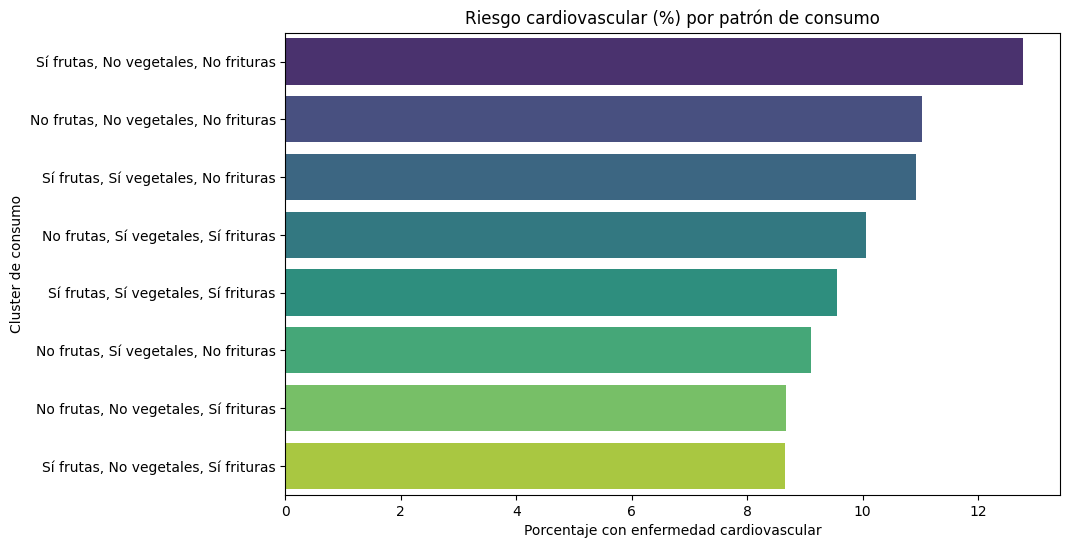

In [ ]:
# Asegurar que las columnas estén como strings
tabla_clusters.columns = tabla_clusters.columns.astype(str)

# Detectar automáticamente la columna de riesgo (Heart_Disease = 1 o "Yes" o "Sí")
col_riesgo = [c for c in tabla_clusters.columns if c in ["1", "Yes", "Sí"]][0]

# Ordenar clusters por % de riesgo cardiovascular
riesgo_clusters = tabla_clusters[col_riesgo].sort_values(ascending=False)

# Gráfico de barras ordenado
plt.figure(figsize=(10,6))
sns.barplot(x=riesgo_clusters.values, y=riesgo_clusters.index, palette="viridis")
plt.title("Riesgo cardiovascular (%) por patrón de consumo")
plt.xlabel("Porcentaje con enfermedad cardiovascular")
plt.ylabel("Cluster de consumo")
plt.show()


A continuacón procederé con Machine Learning no supervisado, algoritmo K-means.

Saving CVD_cleaned.csv to CVD_cleaned.csv
Forma original del dataset: (3463, 19)
Forma después de eliminar nulos: (3373, 19)

Tamaño de cada cluster:
Cluster
4    1320
3     856
1     528
2     401
0     268
Name: count, dtype: int64

Promedios por cluster:


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Cluster,,,,,,,
0,172.88,79.72,26.54,24.03,22.83,14.54,7.02
1,168.01,114.71,40.61,1.66,20.35,10.30,5.98
2,169.24,79.80,27.82,1.59,70.87,24.09,7.83
3,181.63,94.05,28.51,2.24,17.85,11.12,9.73
4,163.72,69.94,26.16,1.31,18.23,10.41,5.07


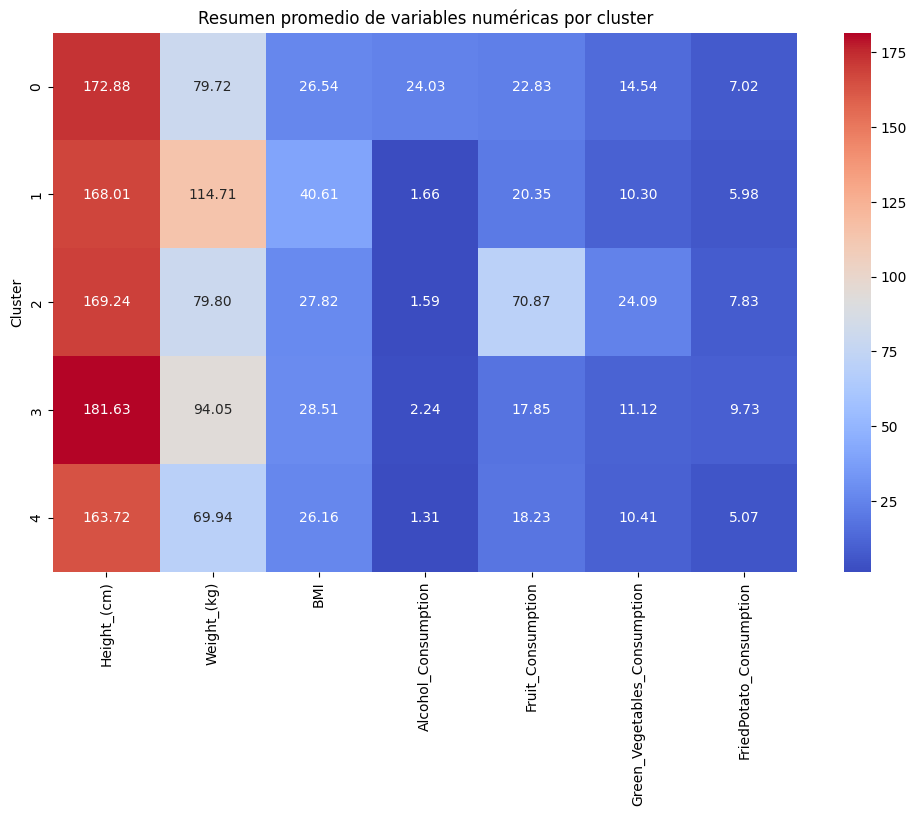

In [ ]:
# ===============================
# K-means clustering (5 clusters) - flujo completo
# ===============================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- 1) Subir archivo ---
uploaded = files.upload()

# Cambiar el nombre según corresponda
file_name = list(uploaded.keys())[0]

# --- 2) Cargar dataset ---
df = pd.read_csv(file_name)
print("Forma original del dataset:", df.shape)

# --- 3) Eliminar filas con valores nulos ---
df_limpio = df.dropna().copy()
print("Forma después de eliminar nulos:", df_limpio.shape)

# --- 4) Selección automática de todas las columnas numéricas ---
df_num = df_limpio.select_dtypes(include=[np.number]).copy()

# --- 5) Escalamiento ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# --- 6) Modelo K-means ---
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_limpio["Cluster"] = kmeans.fit_predict(X_scaled)

# --- 7) Info de clusters ---
print("\nTamaño de cada cluster:")
print(df_limpio["Cluster"].value_counts())

cluster_summary = df_limpio.groupby("Cluster")[df_num.columns].mean().round(2)
print("\nPromedios por cluster:")
display(cluster_summary)

# --- 8) Visualización: ejemplo BMI vs Age si existen ---
if "BMI" in df_limpio.columns and "Age_Category_num" in df_limpio.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="BMI", y="Age_Category_num", hue="Cluster",
                    data=df_limpio, palette="Set1", alpha=0.7)
    plt.title("Clusters de personas según BMI y Edad")
    plt.xlabel("BMI")
    plt.ylabel("Edad (codificada)")
    plt.show()

# --- 9) Heatmap con promedios de cluster ---
plt.figure(figsize=(12,7))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Resumen promedio de variables numéricas por cluster")
plt.show()


# Perfiles de los 5 clusters (K-means)

### Cluster 0 (268 personas)
- **Altura promedio:** 172.9 cm  
- **Peso promedio:** 79.7 kg  
- **BMI:** 26.5 (sobrepeso leve)  
- **Alcohol:** alto (24.0, el más elevado del conjunto)  
- **Frutas y vegetales:** consumo bajo de frutas (22.8) y vegetales (14.5)  
- **Frituras:** moderado (7.0)  
- **Interpretación:** Grupo relativamente joven-adulto, con sobrepeso leve y alto consumo de alcohol, dieta poco equilibrada. Perfil de riesgo principalmente asociado a hábitos de consumo.

---

### Cluster 1 (528 personas)
- **Altura promedio:** 168.0 cm  
- **Peso promedio:** 114.7 kg  
- **BMI:** 40.6 (**obesidad severa**)  
- **Alcohol:** muy bajo (1.7)  
- **Frutas y vegetales:** consumo bajo de frutas (20.3) y vegetales (10.3)  
- **Frituras:** bajo-moderado (6.0)  
- **Interpretación:** Grupo de menor altura, con obesidad mórbida y muy bajo consumo de alcohol. La dieta muestra poca ingesta de alimentos saludables. Es el cluster con **mayor riesgo metabólico** por el peso y BMI extremadamente altos.

---

### Cluster 2 (401 personas)
- **Altura promedio:** 169.2 cm  
- **Peso promedio:** 79.8 kg  
- **BMI:** 27.8 (sobrepeso cercano a obesidad I)  
- **Alcohol:** muy bajo (1.6)  
- **Frutas y vegetales:** consumo **muy alto de frutas (70.9)** y elevado de vegetales (24.1)  
- **Frituras:** moderadas (7.8)  
- **Interpretación:** Grupo con dieta más saludable, alto consumo de frutas y vegetales, bajo consumo de alcohol, aunque con sobrepeso leve. Puede ser un cluster con **mejor perfil protector** en términos de alimentación, aunque aún con exceso de peso.

---

### Cluster 3 (856 personas)
- **Altura promedio:** 181.6 cm (**los más altos**)  
- **Peso promedio:** 94.0 kg  
- **BMI:** 28.5 (sobrepeso alto, cercano a obesidad I)  
- **Alcohol:** bajo (2.2)  
- **Frutas y vegetales:** consumo bajo de frutas (17.9) y vegetales (11.1)  
- **Frituras:** más alto que el resto (9.7)  
- **Interpretación:** Grupo más alto en estatura, con sobrepeso marcado y consumo más alto de frituras, bajo en frutas y vegetales. Perfil de riesgo relacionado con **dieta menos saludable**.

---

### Cluster 4 (1320 personas, el más grande)
- **Altura promedio:** 163.7 cm (**los más bajos**)  
- **Peso promedio:** 69.9 kg  
- **BMI:** 26.2 (sobrepeso leve)  
- **Alcohol:** muy bajo (1.3)  
- **Frutas y vegetales:** bajo consumo de frutas (18.2) y vegetales (10.4)  
- **Frituras:** bajo (5.1)  
- **Interpretación:** Grupo mayoritario, más bajo en estatura, con sobrepeso leve, bajo consumo de alcohol y dieta limitada en frutas/vegetales. Representa un perfil “promedio” del dataset, con riesgos moderados por la mala calidad de la dieta.

---

# Síntesis general
- **Cluster 1** → Grupo crítico por obesidad severa (alto riesgo).  
- **Cluster 2** → Grupo protector, con alto consumo de frutas y vegetales, aunque aún con sobrepeso.  
- **Cluster 0 y 3** → Sobrepeso con dieta poco saludable, diferenciados por alto consumo de alcohol (Cluster 0) y de frituras (Cluster 3).  
- **Cluster 4** → Grupo mayoritario, con sobrepeso leve y dieta deficiente en alimentos saludables.  

En conjunto, los resultados muestran que **el exceso de peso es común a todos los clusters** (ninguno queda en promedio en normopeso), y que las diferencias vienen dadas más por los hábitos de alimentación y alcohol que por el BMI en sí.


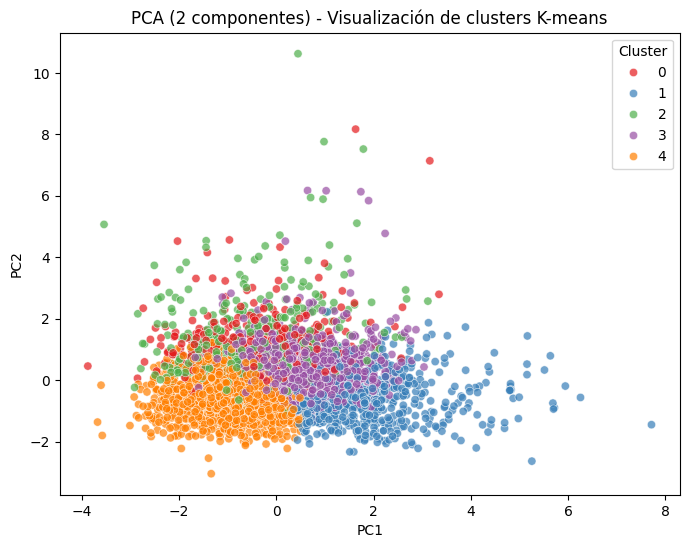

Varianza explicada por PC1 y PC2: [0.28027085 0.18189967]


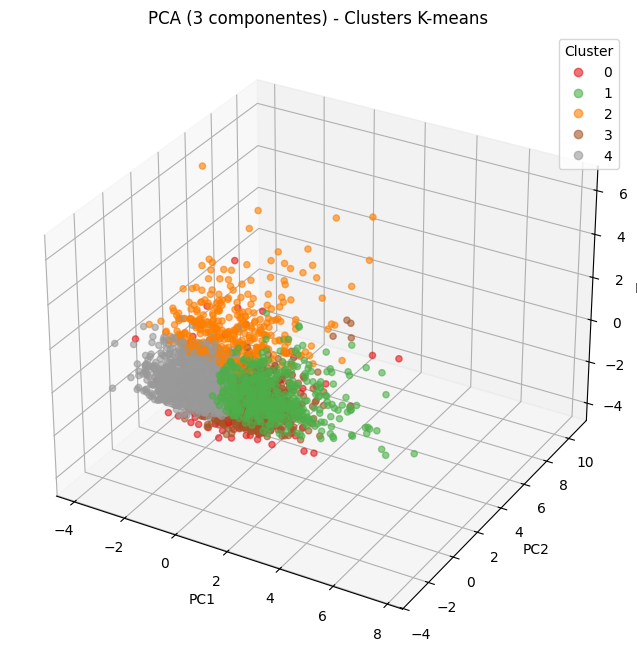

Peso de cada variable en PC1 y PC2:


,PC1,PC2
Height_(cm),0.297,0.420
Weight_(kg),0.709,0.034
BMI,0.625,-0.197
Alcohol_Consumption,-0.048,0.356
Fruit_Consumption,-0.064,0.419
Green_Vegetables_Consumption,-0.047,0.539
FriedPotato_Consumption,0.098,0.437


In [ ]:
# ===============================
# PCA aplicado a K-means
# ===============================

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Selección de variables numéricas ---
df_num = df_limpio.select_dtypes(include=[np.number]).drop(columns=["Cluster"], errors="ignore")

# --- 2) Escalamiento ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# --- 3) PCA con 2 componentes principales ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con resultados
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df_limpio["Cluster"].values

# --- 4) Visualización 2D ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette="Set1", alpha=0.7)
plt.title("PCA (2 componentes) - Visualización de clusters K-means")
plt.show()

# --- 5) Varianza explicada ---
print("Varianza explicada por PC1 y PC2:", pca.explained_variance_ratio_)

# --- 6) PCA con 3 componentes (para visualización 3D) ---
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=df_limpio["Cluster"], cmap="Set1", alpha=0.6)
ax.set_title("PCA (3 componentes) - Clusters K-means")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# --- 7) Cargarings (peso de cada variable en los componentes principales) ---
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=df_num.columns
)
print("Peso de cada variable en PC1 y PC2:")
display(loadings.round(3))


In [ ]:
# Asegurar que Heart_Disease sea numérica (0 = No, 1 = Sí)
df_limpio["Heart_Disease_num"] = df_limpio["Heart_Disease"].map({"No": 0, "Yes": 1})

# Calcular riesgo promedio por cluster
riesgo_clusters = df_limpio.groupby("Cluster")["Heart_Disease_num"].mean().round(3)

print("Proporción de riesgo cardiovascular por cluster:")
print(riesgo_clusters)


Proporción de riesgo cardiovascular por cluster:
Cluster
0    0.067
1    0.108
2    0.077
3    0.121
4    0.104
Name: Heart_Disease_num, dtype: float64


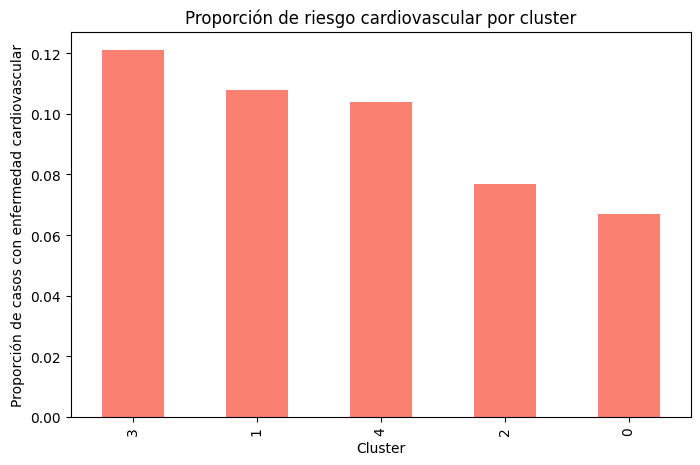

In [ ]:
plt.figure(figsize=(8,5))
riesgo_clusters.sort_values(ascending=False).plot(kind="bar", color="salmon")
plt.title("Proporción de riesgo cardiovascular por cluster")
plt.ylabel("Proporción de casos con enfermedad cardiovascular")
plt.xlabel("Cluster")
plt.show()


**PROYECTO FINAL**

In [6]:
from google.colab import files
import pandas as pd

# Subí el archivo (te va a abrir un selector de archivos)
uploaded = files.upload()




Saving CVD_cleaned.csv to CVD_cleaned (3).csv


In [10]:
from google.colab import files
import pandas as pd

# Subí tu archivo CSV desde la computadora
uploaded = files.upload()


Saving CVD_cleaned.csv to CVD_cleaned (4).csv


In [11]:
# Cargamos el archivo subido (usá el nombre exacto del archivo)
df = pd.read_csv('CVD_cleaned.csv')

# Verificamos que se haya cargado
print(df.shape)
df.head()


(3463, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [13]:
# === Feature Selection robusto a NaNs y categóricas ===
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# 1) Copia y target binario robusto a mayúsc/minúsc/espacios
data = df.copy()
if "Heart_Disease" not in data.columns:
    raise ValueError("No existe la columna 'Heart_Disease' en el DataFrame.")

y = (data["Heart_Disease"]
     .astype(str)
     .str.strip()
     .str.upper()
     .map({"YES": 1, "NO": 0}))

if y.isna().any():
    bad_vals = data.loc[y.isna(), "Heart_Disease"].unique()
    raise ValueError(f"Hay valores de Heart_Disease no reconocidos: {bad_vals}. Esperaba YES/NO.")

X = data.drop(columns=["Heart_Disease"])

# 2) Detectar tipos
numeric_cols = X.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# 3) Preprocesamiento: imputación + one-hot (solo para categóricas)
numeric_pipe = SimpleImputer(strategy="median")
categorical_pipe = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy="most_frequent"), categorical_cols),
    ],
    remainder="drop",
)
# OneHotEncoder fuera del sub-CT para mantener nombres claros
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# 3.a) Imputar


ValueError: Hay valores de Heart_Disease no reconocidos: [nan]. Esperaba YES/NO.

In [14]:
# === Feature Selection robusto: limpia target, imputa features, OHE, MI ===
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# --- 0) Diagnóstico rápido del target (opcional pero útil) ---
print("Valores de Heart_Disease (incluyendo NaN):")
print(df["Heart_Disease"].astype(str).str.strip().str.upper().value_counts(dropna=False).head(20))
print()

# --- 1) Normalizar y limpiar el target ---
data = df.copy()

# Normalización flexible del target a 0/1
target_raw = data["Heart_Disease"].astype(str).str.strip().str.upper()

map_dict = {
    "YES": 1, "Y": 1, "SI": 1, "TRUE": 1, "1": 1,
    "NO": 0,  "N": 0, "FALSE": 0, "0": 0
}
y = target_raw.map(map_dict)

# Quitar filas con target desconocido/NaN
mask = y.notna()
dropped = (~mask).sum()
if dropped > 0:
    print(f"⚠️ Se eliminaron {dropped} filas por target 'Heart_Disease' vacío o no reconocido.")

X = data.loc[mask].drop(columns=["Heart_Disease"])
y = y.loc[mask].astype(int)

# --- 2) Detectar tipos de columnas ---
numeric_cols = X.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# --- 3) Preprocesamiento (imputación + OHE) ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="drop"
)

# Fit-transform para obtener matriz preparada y nombres de features
X_prepared = preprocessor.fit_transform(X)

# Construir nombres de columnas transformadas
feature_names = []
if numeric_cols:
    feature_names.extend(numeric_cols)
if categorical_cols:
    ohe = preprocessor.named_transformers_["cat"]["ohe"]
    ohe_names = ohe.get_feature_names_out(categorical_cols).tolist()
    feature_names.extend(ohe_names)

X_prepared = pd.DataFrame(X_prepared, columns=feature_names, index=X.index)

# --- 4) SelectKBest con mutual_info_classif ---
k = min(6, X_prepared.shape[1])  # por si hay menos columnas después del OHE
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X_prepared, y)

mask_sel = selector.get_support()
scores = selector.scores_

ranking = (pd.DataFrame({"feature": X_prepared.columns, "score": scores})
           .sort_values("score", ascending=False)
           .reset_index(drop=True))

selected_columns = ranking.head(k)["feature"].tolist()

print("\n✅ Las 6 (o menos) columnas más relacionadas con Heart_Disease son:\n")
for col in selected_columns:
    print("-", col)

print("\n📊 Top 10 puntajes de información mutua:")
display(ranking.head(10))


Valores de Heart_Disease (incluyendo NaN):
Heart_Disease
NO     3026
YES     347
NAN      90
Name: count, dtype: int64

⚠️ Se eliminaron 90 filas por target 'Heart_Disease' vacío o no reconocido.


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [15]:
# === Feature Selection (Opción 1) ===
# - Normaliza Heart_Disease a 0/1 (acepta YES/NO, Y/N, SI/NO, TRUE/FALSE, 1/0)
# - Elimina filas con target vacío/no reconocido
# - Imputa NaNs (mediana numéricas, más frecuente categóricas)
# - One-Hot Encoder con sparse_output=False (sklearn >= 1.4)
# - SelectKBest + mutual_info_classif para k=6
# - Imprime las 6 seleccionadas y ranking top-10

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# --- Diagnóstico opcional del target ---
print("Valores de Heart_Disease (incluye NaN si los hay):")
print(df["Heart_Disease"].astype(str).str.strip().str.upper().value_counts(dropna=False).head(20))
print()

# --- 1) Normalizar y limpiar target ---
data = df.copy()

target_raw = data["Heart_Disease"].astype(str).str.strip().str.upper()
map_dict = {
    "YES": 1, "Y": 1, "SI": 1, "TRUE": 1, "1": 1,
    "NO": 0,  "N": 0, "FALSE": 0, "0": 0
}
y = target_raw.map(map_dict)

# Filtrar filas con target válido
mask_valid = y.notna()
dropped = (~mask_valid).sum()
if dropped > 0:
    print(f"⚠️ Se eliminaron {dropped} filas por target 'Heart_Disease' vacío o no reconocido.")

X = data.loc[mask_valid].drop(columns=["Heart_Disease"])
y = y.loc[mask_valid].astype(int)

# --- 2) Detectar tipos ---
numeric_cols = X.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# --- 3) Preprocesamiento: imputación + OHE ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="drop"
)

# Fit-transform para obtener matriz procesada
X_prepared = preprocessor.fit_transform(X)

# Obtener nombres de columnas transformadas
feature_names = []
if numeric_cols:
    feature_names.extend(numeric_cols)
if categorical_cols:
    ohe = preprocessor.named_transformers_["cat"]["ohe"]
    ohe_names = ohe.get_feature_names_out(categorical_cols).tolist()
    feature_names.extend(ohe_names)

X_prepared = pd.DataFrame(X_prepared, columns=feature_names, index=X.index)

# --- 4) SelectKBest + Mutual Information ---
k = min(6, X_prepared.shape[1])
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X_prepared, y)

scores = selector.scores_
ranking = (pd.DataFrame({"feature": X_prepared.columns, "score": scores})
           .sort_values("score", ascending=False)
           .reset_index(drop=True))

selected_columns = ranking.head(k)["feature"].tolist()

print("\n✅ Las 6 (o menos) columnas más relacionadas con Heart_Disease son:\n")
for col in selected_columns:
    print("-", col)

print("\n📊 Top 10 puntajes de información mutua:")
display(ranking.head(10))


Valores de Heart_Disease (incluye NaN si los hay):
Heart_Disease
NO     3026
YES     347
NAN      90
Name: count, dtype: int64

⚠️ Se eliminaron 90 filas por target 'Heart_Disease' vacío o no reconocido.

✅ Las 6 (o menos) columnas más relacionadas con Heart_Disease son:

- Diabetes_No
- Height_(cm)
- Depression_No
- General_Health_Fair
- Arthritis_No
- Age_Category_30-34

📊 Top 10 puntajes de información mutua:


,feature,score
0,Diabetes_No,0.016416
1,Height_(cm),0.015107
2,Depression_No,0.014807
3,General_Health_Fair,0.014372
4,Arthritis_No,0.013959
5,Age_Category_30-34,0.011999
6,Exercise_No,0.011606
7,Checkup_Within the past year,0.011354
8,Age_Category_18-24,0.010128
9,Diabetes_Yes,0.009917


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Accuracy : 0.8969
Precision: 0.0000
Recall   : 0.0000
F1-score : 0.0000
ROC AUC  : 0.7459

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       757
           1       0.00      0.00      0.00        87

    accuracy                           0.90       844
   macro avg       0.45      0.50      0.47       844
weighted avg       0.80      0.90      0.85       844



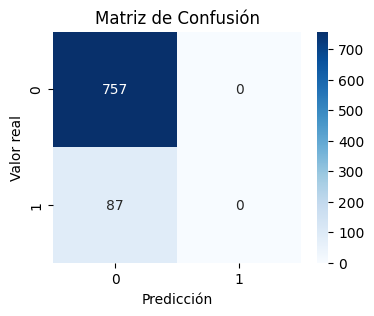

In [16]:
# --- Entrenamiento de modelo de regresión logística ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Subconjunto de las 6 columnas seleccionadas
selected_features = [
    'Diabetes_No',
    'Height_(cm)',
    'Depression_No',
    'General_Health_Fair',
    'Arthritis_No',
    'Age_Category_30-34'
]

# Aseguramos que todas estén en el dataset preparado
X_sel = X_prepared[selected_features].copy()
y_sel = y.copy()

# 2) División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y_sel, test_size=0.25, random_state=42, stratify=y_sel
)

# 3) Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4) Modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 5) Predicciones y métricas
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 6) Matriz de confusión visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()


El modelo de regresión logística entrenado con las seis variables seleccionadas logró una precisión general del 90 %, pero no detectó ningún caso positivo de enfermedad cardíaca. Esto indica un fuerte desbalance: la mayoría de los registros pertenecen a la categoría “No enfermedad”
Para mejorar la capacidad de detección (recall) de los casos positivos, vamos a reentrenar con balanceo de clases


Pesos por clase usados: {0: 0.5572939620978404, 1: 14.590384615384615}

== Métricas (umbral=0.35) ==
Accuracy : 0.1469
Precision: 0.1068
Recall   : 0.9885
F1-score : 0.1928
ROC AUC  : 0.7449

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.05      0.10       757
           1       0.11      0.99      0.19        87

    accuracy                           0.15       844
   macro avg       0.54      0.52      0.14       844
weighted avg       0.88      0.15      0.11       844



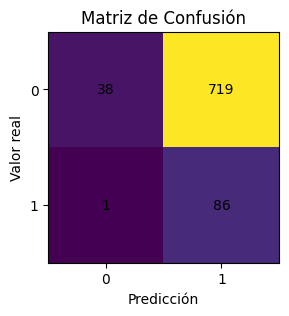

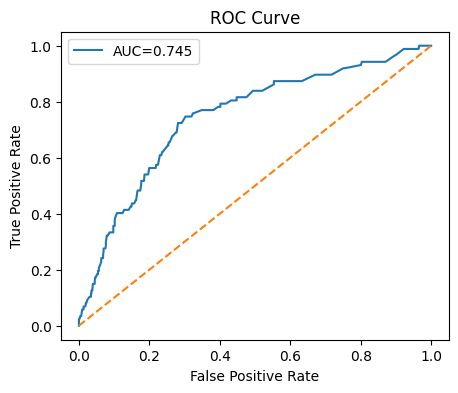

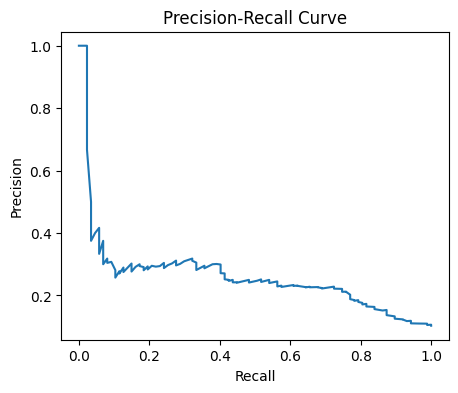

In [17]:
# ========= Entrenamiento con fuerte balanceo hacia la clase YES =========
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt

# 1) Usamos SOLO tus 6 features ya elegidas (deben existir en X_prepared)
selected_features = [
    'Diabetes_No',
    'Height_(cm)',
    'Depression_No',
    'General_Health_Fair',
    'Arthritis_No',
    'Age_Category_30-34'
]
X_sel = X_prepared[selected_features].copy()
y_sel = y.copy()

# 2) Split estratificado (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y_sel, test_size=0.25, random_state=42, stratify=y_sel
)

# 3) Estandarización
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4) Pesos por clase
#    - base: inverso de la frecuencia (balanced)
#    - pos_boost: multiplicador extra para la clase positiva (YES=1)
classes = np.array([0, 1])
base_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

pos_boost = 3.0   # <-- Aumentá este número (p.ej., 3, 5, 8) si querés aún más importancia a YES
w0 = float(base_weights[0])
w1 = float(base_weights[1]) * pos_boost
class_weight = {0: w0, 1: w1}
print("Pesos por clase usados:", class_weight)

# 5) Modelo: Logistic Regression con pesos
#    'liblinear' soporta bien class_weight y convergencia en datasets tabulares
model = LogisticRegression(
    max_iter=2000,
    random_state=42,
    solver='liblinear',
    class_weight=class_weight
)
model.fit(X_train_s, y_train)

# 6) Predicción de probabilidades y umbral ajustable
y_proba = model.predict_proba(X_test_s)[:, 1]

# Umbral por defecto 0.5 suele NO ser ideal en desbalance; usamos uno más bajo para empujar recall
threshold = 0.35   # <-- probá 0.30–0.45 según el trade-off que busques
y_pred = (y_proba >= threshold).astype(int)

# 7) Métricas
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print(f"\n== Métricas (umbral={threshold:.2f}) ==")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, zero_division=0))

# 8) Matriz de confusión (sin seaborn para mantener dependencias simples)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
plt.imshow(cm)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.xticks([0,1],[0,1])
plt.yticks([0,1],[0,1])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.show()

# 9) Curva ROC (útil para comparar thresholds)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 10) Curva Precision-Recall (muy informativa en desbalance)
prec_curve, rec_curve, thr = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(5,4))
plt.plot(rec_curve, prec_curve)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


Accuracy = 0.15 Muy bajo, porque el modelo ahora clasifica muchos casos como “YES” (lo que baja la proporción total de aciertos). Precision = 0.10 De cada 10 casos que el modelo marcó como “enfermedad”, solo 1 realmente lo era. Recall = 0.99 Excelente sensibilidad: detectó el 99 % de los casos enfermos reales. F1-score = 0.19 Valor bajo porque hay un gran desbalance entre precision y recall. ROC AUC = 0.74 Mide capacidad discriminativa general. Un valor de 0.74 indica que el modelo distingue moderadamente bien entre enfermos y sanos.


CONCLUSION


Tengo un analisis típico de medicina. Identifca por exceso todos los casos riesgosos para tratar preventivamente. De 10 hay 1 solo real, pero eso es prevención. Es preferible mandar 10 personas a hacer chequeos adicionales y así detectar el que va a tener un infarto, que no detectar ningún caso riesgoso. Ocurre lo mismo en la detección de lunares sospechosos de melanoma.